
In this problem we will be applying PCA on the Lending Club loan dataset. A simplified version of the dataset with reduced number of samples. Please use the dataset given in the file named `loan.csv`.
. 

In [4]:
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the csv file and fill Nan/empty values as 0
dataset = pd.read_csv('loan.csv')
df = dataset.fillna(0)

# We will be using only two classes and group them as below
def LoanResult(status):
    if (status == 'Fully Paid') or (status == 'Current'):
        return 1
    else:
        return 0

df['loan_status'] = df['loan_status'].apply(LoanResult)

# Set of features which indicate the dimensionality of the data
df = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
             'emp_length', 'home_ownership','annual_inc', 'verification_status', 'loan_status',
             'purpose','addr_state', 'dti','open_acc', 'pub_rec', 'revol_bal', 'revol_util', 
             'initial_list_status', 'recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
             'application_type', 'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal', 'chargeoff_within_12_mths',
             'pub_rec_bankruptcies', 'tax_liens', 'debt_settlement_flag']]

#For simplicity, in this question, we select all columns that do not contain integer of float type of data. Then, one hot encoding is performed.
df_cat = df.select_dtypes(exclude=['int64', 'float64'])
df = pd.get_dummies(df, df_cat.columns.values)

df.shape

# We select the `loan_status` column as the target column.  

C:\Users\I068117\AppData\Local\Temp\ipykernel_44952\2164239055.py:8: DtypeWarning: Columns (123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('loan.csv')


(226067, 161)

In [5]:
X=df.drop('loan_status',axis=1)
y=df['loan_status']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

Reduce the dimension of X to the following components: 100, 30, 10. For each of the three models, print the percentage(%) of variance captured by each of the compnonets and plot the scree plo

percent variance for 100 component is [9.17 7.   6.03 5.49 4.92 4.6  3.85 3.39 3.22 2.88 2.82 2.29 2.22 1.82
 1.58 1.49 1.27 1.23 1.18 1.16 1.1  1.08 1.05 1.01 0.97 0.96 0.95 0.92
 0.91 0.84 0.83 0.81 0.8  0.79 0.75 0.71 0.7  0.69 0.69 0.66 0.58 0.56
 0.53 0.51 0.49 0.49 0.48 0.45 0.45 0.4  0.39 0.38 0.38 0.37 0.36 0.36
 0.35 0.33 0.32 0.31 0.28 0.26 0.25 0.25 0.24 0.24 0.23 0.23 0.21 0.2
 0.2  0.19 0.17 0.17 0.16 0.15 0.15 0.14 0.14 0.14 0.13 0.13 0.13 0.12
 0.12 0.11 0.1  0.1  0.1  0.1  0.09 0.09 0.09 0.08 0.08 0.08 0.07 0.07
 0.07 0.06]
percent variance for 30 component is [9.17 7.   6.03 5.49 4.92 4.6  3.85 3.39 3.22 2.88 2.82 2.29 2.22 1.81
 1.58 1.49 1.27 1.23 1.18 1.16 1.1  1.08 1.05 1.01 0.96 0.96 0.95 0.91
 0.9  0.84]
percent variance for 10 component is [9.17 7.   6.03 5.49 4.92 4.6  3.85 3.39 3.22 2.88]


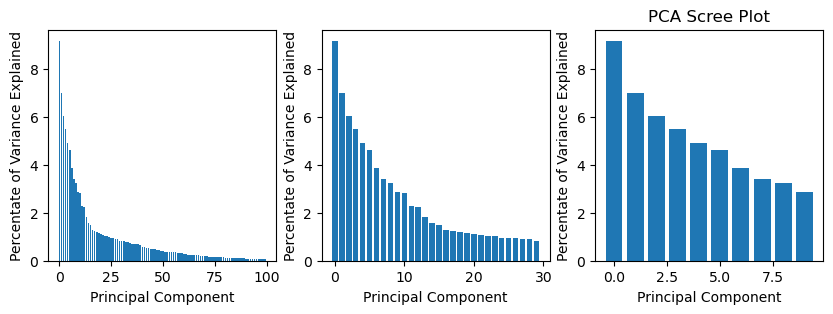

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

def scree_plot():
    fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(10,3))
    for i,x in enumerate([100,30,10]):
        pca = PCA(n_components=x)
        pca.fit(X_train_scaled)
        percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
        print(f'percent variance for {x} component is {percent_variance}')
        ax[i].bar(x= range(0,x), height=percent_variance)
        ax[i].set_ylabel('Percentate of Variance Explained') 
        ax[i].set_xlabel('Principal Component')  
    plt.title('PCA Scree Plot')
    plt.show()
    
scree_plot()

Train LogisticRegression with the full dimension X and each of the redued dimension X from PCA in the previous step (100, 30 and 10 dimensions). Print the classification reports for all the models

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

log_model = LogisticRegression()

log_model.fit(X_train_scaled,y_train)
y_pred = log_model.predict(X_test_scaled)
print(f'Classification report for all dimension')
print(classification_report(y_test,y_pred))

for i,x in enumerate([100,30,10]):
    pca = PCA(n_components=x)
    pca_train_scaled=pca.fit_transform(X_train_scaled)
    pca_test_scaled=pca.transform(X_test_scaled)
    
    log_model.fit(pca_train_scaled,y_train)
    y_pred = log_model.predict(pca_test_scaled)
    print(f'Classification report for PCA component {x}')
    print(classification_report(y_test,y_pred))
    #cm = confusion_matrix(y_test, y_pred)
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    #disp.plot()


C:\Users\I068117\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report for all dimension
              precision    recall  f1-score   support

           0       0.76      0.46      0.57       850
           1       0.99      1.00      0.99     55667

    accuracy                           0.99     56517
   macro avg       0.88      0.73      0.78     56517
weighted avg       0.99      0.99      0.99     56517

Classification report for PCA component 100
              precision    recall  f1-score   support

           0       0.72      0.22      0.33       850
           1       0.99      1.00      0.99     55667

    accuracy                           0.99     56517
   macro avg       0.86      0.61      0.66     56517
weighted avg       0.98      0.99      0.98     56517

Classification report for PCA component 30
              precision    recall  f1-score   support

           0       0.30      0.05      0.08       850
           1       0.99      1.00      0.99     55667

    accuracy                           0.98     56517
 

C:\Users\I068117\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\I068117\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\I068117\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ROC curves for all models (trained using dataset containing all dimensions and dataset containing reduced dimensions, total 4 models)

C:\Users\I068117\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC curve for all dimensions
ROC curve for PCA component 100
ROC curve for PCA component 30
ROC curve for PCA component 10


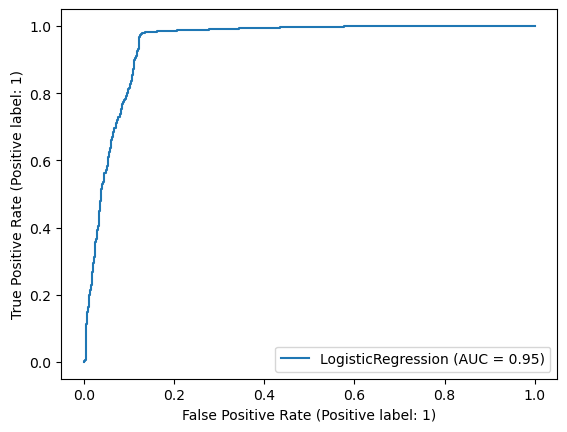

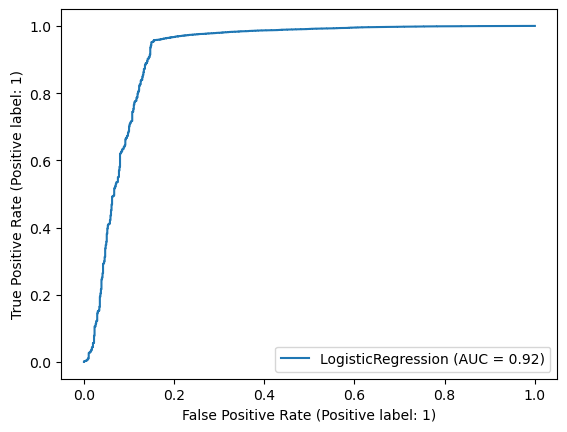

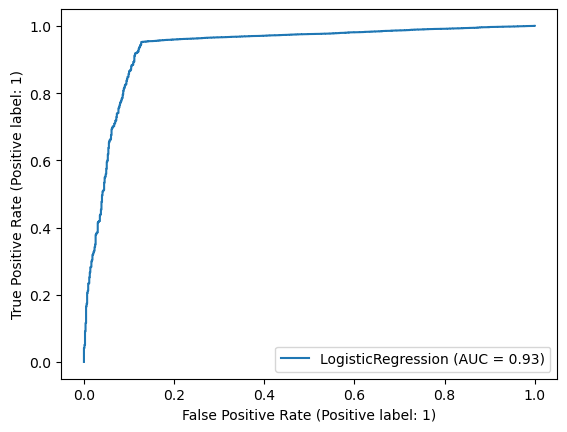

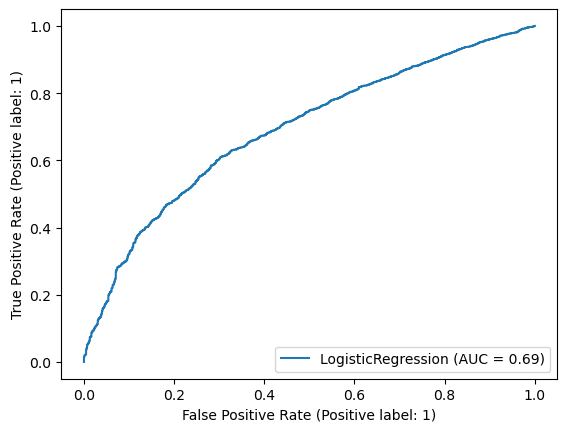

In [56]:
from sklearn.metrics import RocCurveDisplay

log_model.fit(X_train_scaled,y_train)
y_pred = log_model.predict(X_test_scaled)
print(f'ROC curve for all dimensions')
RocCurveDisplay.from_estimator(log_model, X_test_scaled, y_test)
    
for i,x in enumerate([100,30,10]):
    pca = PCA(n_components=x)
    pca_train_scaled=pca.fit_transform(X_train_scaled)
    pca_test_scaled=pca.transform(X_test_scaled)
    log_model.fit(pca_train_scaled,y_train)
    y_pred = log_model.predict(pca_test_scaled)
    print(f'ROC curve for PCA component {x}')
    RocCurveDisplay.from_estimator(log_model, pca_test_scaled, y_test)

Area under the curve is a measure of seperability of the binary classes by our model. Higher the curver, better is the performance of our model. AUC reduces as we reduce the PCA dimensions or variance in the model